## *Handwritten digit recognition using Deep Learning Frameworks*

In this Notebook we try to identify digits from a dataset of thousands of handwritten images. To this end, we develop two classic deep learning models, a *Multi Layer Perceptron (MLP)* and a *Convolution Neural Network (CNN)*. We develop several dataloading pipelines and experiment with various techniques such as data augmentation and different training procedures. At the end we achieve a score more than 99 % at the test set. Finally, we make predictions to unlabeled data and visualize the results.

### Part 1. Data Loading & Visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

path_train = os.path.join("csvs","train.csv")
path_test = os.path.join("csvs","test.csv")

In [2]:
data = np.loadtxt(path_train,skiprows=1, delimiter=",")
print(f"- The dataset shape is equal to {data.shape}")
X,y = data[:,1:]/255, data[:,0].astype("int64")

- The dataset shape is equal to (42000, 785)


In [3]:
# Checking the unique digits
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
indices = []
for digit in np.unique(y):
    indices.append(np.where(y == digit)[0])

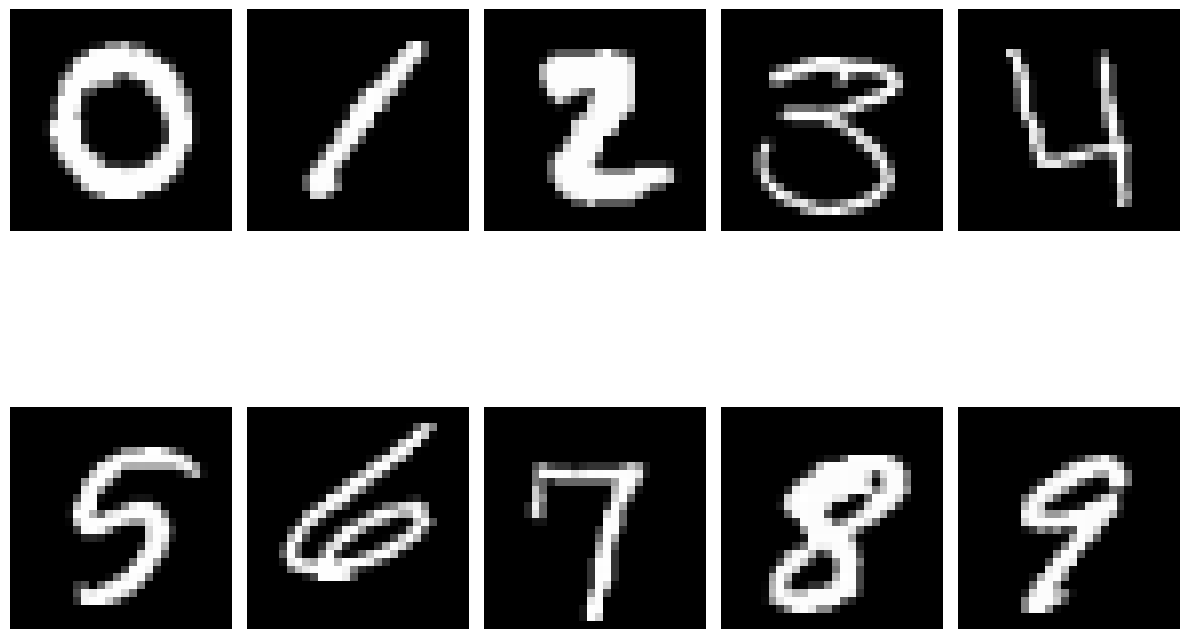

In [5]:
# Visualizing some samples
fig, ax = plt.subplots(figsize = (12,10), nrows = 2, ncols =5)
for i,idx in enumerate(indices):
    r,c = divmod(i,5)
    img = X[idx,:]
    img.resize((28,28))
    ax[r,c].imshow(img, cmap = "gray")
    ax[r,c].axis("off")
plt.tight_layout()
plt.show()

### Part 2. Deep Learning models

Preparing the training, validation and test sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,y, test_size = 0.3, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_val, y_val, test_size = 0.5, random_state=42
)

In [7]:
print(f"Training size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

Training size: 29400, Validation size: 6300, Test size: 6300


#### 2.1. A Simple MLP

In [8]:
from models import mlp_dataset, MLP
from training import training_loop, test_loop

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 128
LR = 1e-3
PATIENCE = 20
loss_fn = nn.CrossEntropyLoss().to(device)
EPOCHS = 300

train_dloader = DataLoader(mlp_dataset(X_train,y_train),
                           batch_size=BATCH_SIZE, shuffle=True)
test_dloader = DataLoader(mlp_dataset(X_test,y_test),batch_size=BATCH_SIZE)
val_dloader = DataLoader(mlp_dataset(X_val, y_val), batch_size=BATCH_SIZE)

In [10]:
model = MLP(hidden_layers=[512,256,128,64]).to(device)

Epoch: 10/300     Training Loss: 0.0596     Validation Loss: 0.0925
Epoch: 20/300     Training Loss: 0.0178     Validation Loss: 0.0661
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 10 out of 20
Epoch: 30/300     Training Loss: 0.0128     Validation Loss: 0.0642
EarlyStopping counter: 15 out of 20
EarlyStopping counter: 20 out of 20
Early stopping


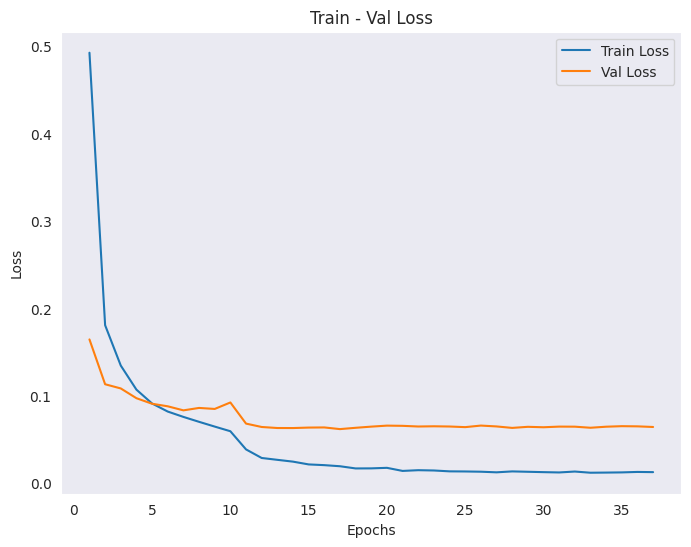

In [11]:
training_loop(model, train_dloader, val_dloader, epochs=EPOCHS, lr = LR,
              loss_fn=loss_fn, regularization="L2", reg_lambda=1e-4, mod_epochs=10,
              early_stopping=True, verbose=False, patience=PATIENCE, title = "MLP training",
              scheduler_bool=True, model_name = "model1")

In [12]:
from sklearn.metrics import classification_report

preds, targets, acc = test_loop(model,test_dloader,device)

print(classification_report(targets, preds))
print(f"Accuracy score: {100*acc:.2f} %")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       604
           1       0.99      0.99      0.99       690
           2       0.97      0.99      0.98       644
           3       0.98      0.98      0.98       675
           4       0.98      0.98      0.98       653
           5       0.98      0.98      0.98       510
           6       0.99      0.99      0.99       625
           7       0.99      0.97      0.98       664
           8       0.98      0.98      0.98       618
           9       0.97      0.97      0.97       617

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300

Accuracy score: 98.17 %


#### 2.2. CNN 

In [13]:
from models import CNN, cnn_dataset

In [14]:
train_dloader = DataLoader(cnn_dataset(X_train,y_train),
                           batch_size=BATCH_SIZE, shuffle=True)
test_dloader = DataLoader(cnn_dataset(X_test,y_test),batch_size=BATCH_SIZE)
val_dloader = DataLoader(cnn_dataset(X_val, y_val), batch_size=BATCH_SIZE)

In [15]:
model = CNN(in_channels=1, out_channels=10).to(device)

Epoch: 10/300     Training Loss: 0.0121     Validation Loss: 0.0428
Epoch: 20/300     Training Loss: 0.0018     Validation Loss: 0.0265
EarlyStopping counter: 5 out of 20
Epoch: 30/300     Training Loss: 0.0015     Validation Loss: 0.0265
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 10 out of 20
Epoch: 40/300     Training Loss: 0.0014     Validation Loss: 0.0266
EarlyStopping counter: 5 out of 20
Epoch: 50/300     Training Loss: 0.0015     Validation Loss: 0.0271
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 5 out of 20
Epoch: 60/300     Training Loss: 0.0014     Validation Loss: 0.0264
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 15 out of 20
Epoch: 70/300     Training Loss: 0.0014     Validation Loss: 0.0270
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 10 out of 20
Epoch: 80/300     Training Loss: 0.0014     Validation Loss: 0.0263
EarlyStopping counter: 15 out of 20
EarlyStopping counter: 20 out of 20
Early stopping


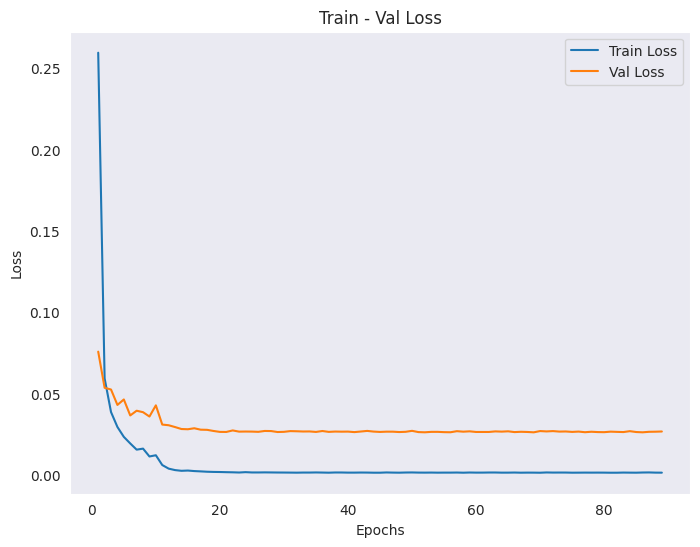

In [16]:
training_loop(model, train_dloader, val_dloader, epochs=EPOCHS, lr = LR,
              loss_fn=loss_fn, regularization="L2", reg_lambda=1e-4, mod_epochs=10,
              early_stopping=True, verbose=False, patience=PATIENCE, title = "CNN Training",
              scheduler_bool=True, model_name="model2")

In [17]:
from sklearn.metrics import classification_report

preds, targets, acc = test_loop(model,test_dloader,device)

print(classification_report(targets, preds))
print(f"Accuracy score: {100*acc:.2f} %")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       604
           1       1.00      1.00      1.00       690
           2       0.99      0.99      0.99       644
           3       0.99      0.99      0.99       675
           4       0.99      0.98      0.99       653
           5       0.99      0.98      0.99       510
           6       1.00      0.99      0.99       625
           7       0.99      0.99      0.99       664
           8       0.99      0.99      0.99       618
           9       0.98      1.00      0.99       617

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300

Accuracy score: 99.11 %


#### 2.3. Applying Data Augmentation

In [18]:
import albumentations as A

In [19]:
transforms = [A.HorizontalFlip(p=1),
              A.OpticalDistortion(distort_limit=1.2,shift_limit=0.6,p=1),
              A.PixelDropout(dropout_prob=0.01,p=1)]

transforms_names = ["Horizontal Flip", "Optical Distortion",
                    "PixelDropout"]

In [20]:
import random
import seaborn as sns

def visualize_tranforms(digit, X, y, transforms, random_state = 42):
    indices = np.where(y == digit)[0]
    random.seed(random_state)
    idx = indices[random.randint(a=0,b=len(indices)-1)]
    img = np.resize(X[idx,:], (28,28,1))
    sns.set_style("dark")
    fig, ax = plt.subplots(figsize = (10,5), nrows = 1, ncols = len(transforms)+1)
    for i in range(len(transforms)+1):
        if i==0:
            ax[i].imshow(img, cmap = "gray")
            ax[i].axis("off")
            ax[i].set_title("original")
        else:
            transformed_img = transforms[i-1](image = img)["image"]
            ax[i].imshow(transformed_img, cmap = "gray")
            ax[i].axis("off")
            ax[i].set_title(transforms_names[i-1])
    plt.show()

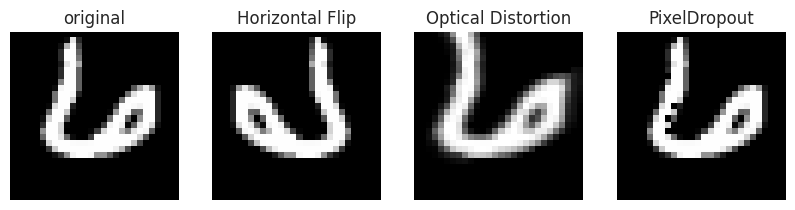

In [21]:
visualize_tranforms(digit = 6,X = X,y = y,transforms=transforms)

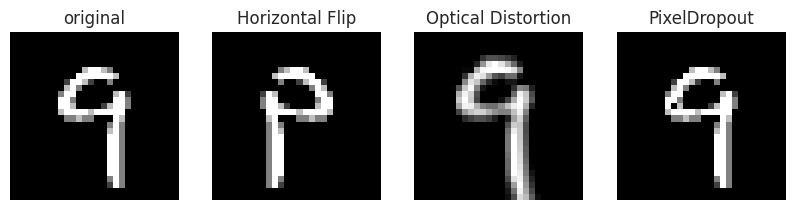

In [22]:
visualize_tranforms(digit = 9,X = X,y = y,transforms=transforms)

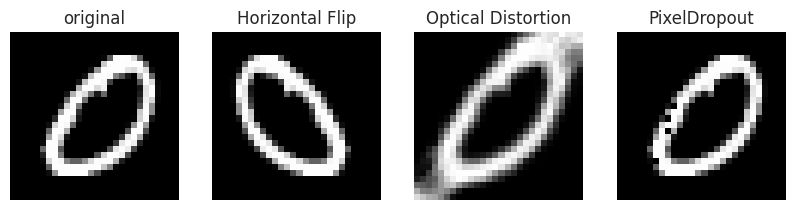

In [23]:
visualize_tranforms(digit = 0,X = X,y = y,transforms=transforms)

In [24]:
transforms = A.Compose([
    A.OpticalDistortion(distort_limit=1.2,shift_limit=0.6,p=0.5),
    A.OneOf([A.HorizontalFlip(p=1),
             A.PixelDropout(dropout_prob=0.01,p=1)
             ], p = 0.5)
])

In [25]:
from models import CNN, cnn_dataset

train_dloader = DataLoader(cnn_dataset(X_train,y_train, transforms=transforms),
                           batch_size=BATCH_SIZE, shuffle=True)
test_dloader = DataLoader(cnn_dataset(X_test,y_test),batch_size=BATCH_SIZE)
val_dloader = DataLoader(cnn_dataset(X_val, y_val), batch_size=BATCH_SIZE)

In [26]:
model = CNN(in_channels=1, out_channels=10).to(device)

Epoch: 10/300     Training Loss: 0.0518     Validation Loss: 0.0438
Epoch: 20/300     Training Loss: 0.0399     Validation Loss: 0.0498
EarlyStopping counter: 5 out of 20
Epoch: 30/300     Training Loss: 0.0183     Validation Loss: 0.0317
EarlyStopping counter: 5 out of 20
Epoch: 40/300     Training Loss: 0.0153     Validation Loss: 0.0335
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 15 out of 20
Epoch: 50/300     Training Loss: 0.0132     Validation Loss: 0.0334
EarlyStopping counter: 20 out of 20
Early stopping


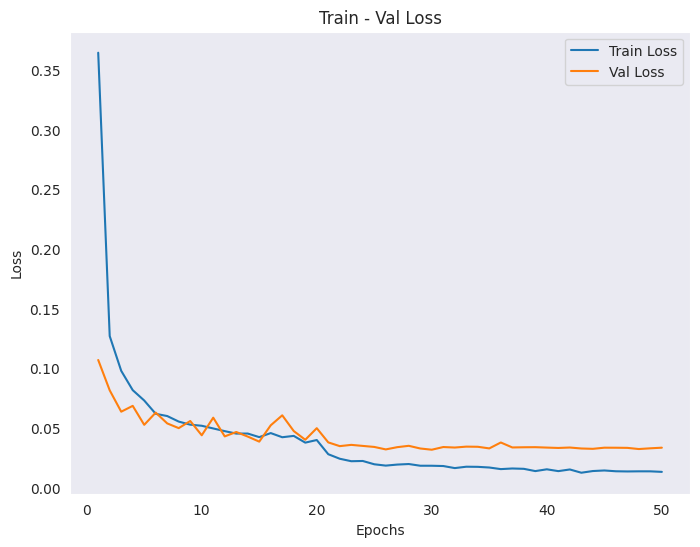

In [27]:
training_loop(model, train_dloader, val_dloader, epochs=EPOCHS, lr = LR,
              loss_fn=loss_fn, regularization="L2", reg_lambda=1e-4, mod_epochs=10,
              early_stopping=True, verbose=False, patience=PATIENCE, title = "CNN Training",
              scheduler_bool=True, step_size = 20, model_name = "model3")

In [28]:
from sklearn.metrics import classification_report

preds, targets, acc = test_loop(model,test_dloader,device)

print(classification_report(targets, preds))
print(f"Accuracy score: {100*acc:.2f} %")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       604
           1       0.99      1.00      0.99       690
           2       0.99      0.99      0.99       644
           3       0.99      0.99      0.99       675
           4       1.00      0.99      0.99       653
           5       0.99      0.98      0.99       510
           6       0.99      0.99      0.99       625
           7       0.99      0.99      0.99       664
           8       0.99      0.99      0.99       618
           9       0.98      1.00      0.99       617

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300

Accuracy score: 99.10 %


### Part 3. Inference & Submissions

#### 3.1. Predictions

In [29]:
test = np.loadtxt(path_test, skiprows=1, delimiter = ",")
print(f"Test contains {test.shape[0]} samples")

Test contains 28000 samples


In [30]:
# Load best model - CNN without data augmentation
best_model = CNN(in_channels=1, out_channels=10).to(device)
best_model.load_state_dict(torch.load(os.path.join("modelcheckpoints", "model2.pt")))

<All keys matched successfully>

In [53]:
class submission_dataset(nn.Module):
    def __init__(self,test_set):
        self.test_set = test_set
    def __len__(self):
        return self.test_set.shape[0]
    def __getitem__(self,idx):
        img = torch.tensor(np.expand_dims(self.test_set[idx,:], axis = 0), dtype=torch.float32)
        return img.view(-1,28,28)/255

In [54]:
import pandas as pd
def submission_loop(model,test, file = "submission.csv"):
    sub_loader = DataLoader(submission_dataset(test), batch_size = 1)
    device = "cuda" if torch.cuda.is_available else "cpu"
    model.eval()
    submissions = np.zeros(shape = (test.shape[0], 2), dtype=np.int64)
    with torch.no_grad():
        for sample_id, img in enumerate(sub_loader):
            img = img.to(device)
            pred_digit = int(torch.argmax(model(img), dim = -1).cpu().numpy())
            submissions[sample_id, 0] = sample_id +1
            submissions[sample_id, 1] = pred_digit
    df_submissions = pd.DataFrame({"ImageId": submissions[:,0],
                                   "Label": submissions[:,1]})
    df_submissions.to_csv(file, sep = ",", header=True, index = False)

In [55]:
submission_loop(best_model, test)

#### 3.2. Visualizing Predictions

In [56]:
submissions = np.loadtxt("submission.csv", skiprows=1,
                         dtype=np.int64, delimiter=",")

In [66]:
def visualize_preds(test, submissions, factor = 5,
                    seed = 24, ncols = 4):
    fig,ax = plt.subplots(figsize = (10,10), nrows = factor,
                      ncols = ncols)
    np.random.seed(seed)
    indices = np.random.randint(low = 0, high = test.shape[0],
                                size = factor*ncols)
    for i, idx in enumerate(indices):
        r,c = divmod(i,ncols)
        img = np.expand_dims(test[idx,:],axis = 0)
        ax[r,c].imshow(np.resize(img,(28,28,1)),
                    cmap = "gray")
        ax[r,c].axis("off")
        ax[r,c].set_title(f"ID:{idx +1}, Pred: {submissions[idx,1]}",
                        fontsize = 10)
    plt.show()

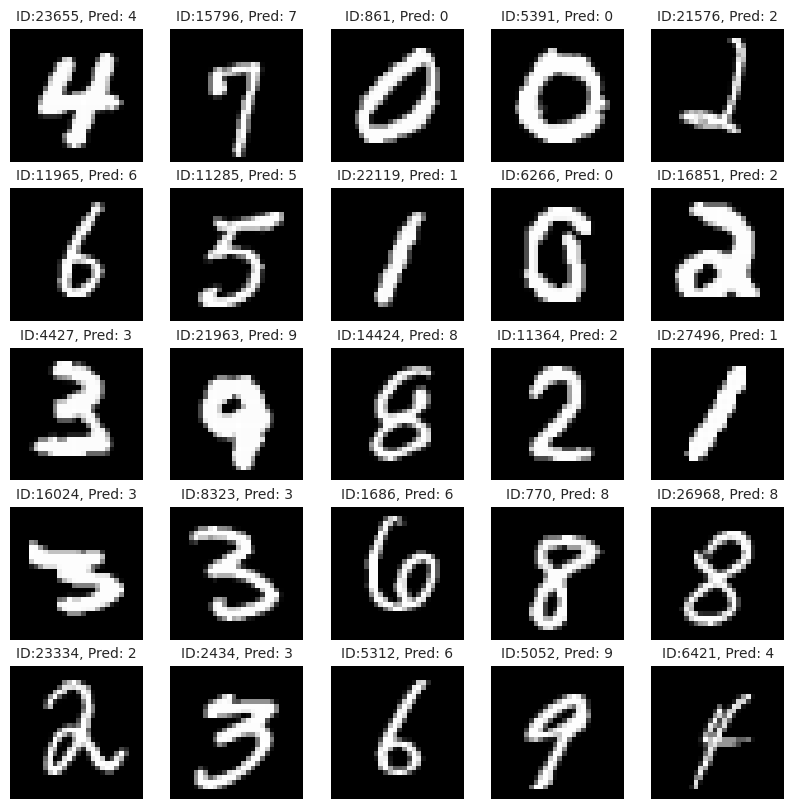

In [68]:
visualize_preds(test, submissions, factor = 5,
                seed = 42, ncols = 5)

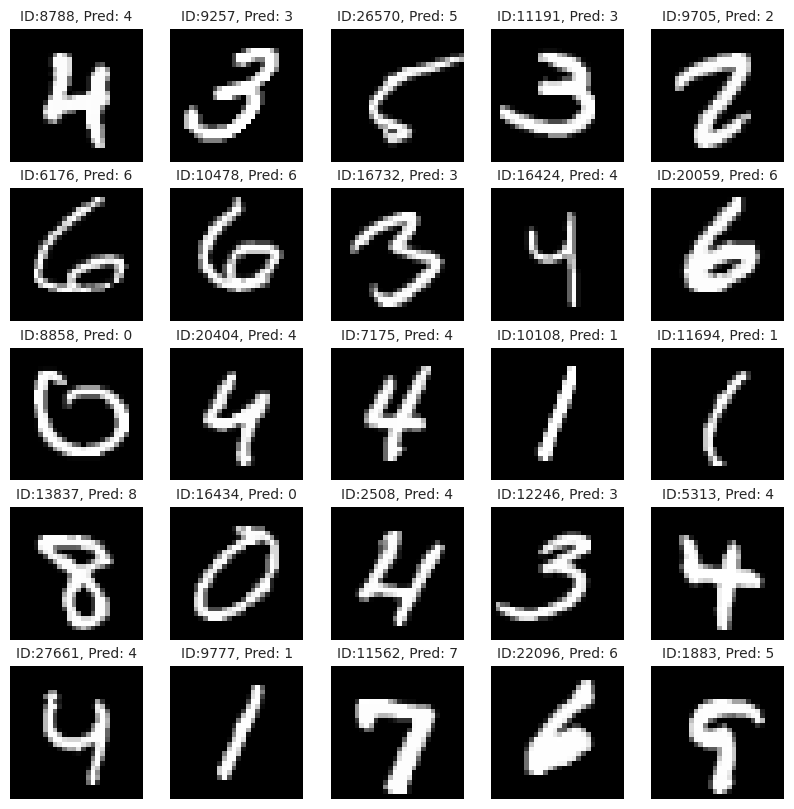

In [69]:
visualize_preds(test, submissions, factor = 5,
                seed = 23, ncols = 5)